### Demo of the final CPP algorithm. 

If the direction changes happened in UDU (up-down-up) or DUD (down-up-down) fashion and if 
- the corresponding peak was higher than 3.5 * std_dev 
- the left and right parts of the peak were above the mean and 
- if height of peak from the mean was higher than the hight of either left and right parts of the UDU and DUD complex, I classified it as a spike.

In [1]:
import numpy as np
import pylab as pl

In [2]:
## reading original spikes, and the ones read from cpp processed files
cppResult = np.loadtxt('./data/demo_spikes_5.dat');
origSpikes = np.loadtxt('./data/spikes5.dat');
output = np.loadtxt('./data/output5.dat');

In [3]:
## lookahead smoothing:

inputArr = output[560:600]
outputArr = np.zeros(len(inputArr))

buffLen = 0
currDir = ""
prevDir = ""
currLow = 5000
currHigh = -5000
three_state_values = [0, 0, 0]
three_previous_states = ["", "", ""]
three_states = ["", "", ""]
peaks = 0

def replaceBuff(i, b, val, three_states):
    outputArr[i-b:i+1] = val
    print(three_states, three_state_values)
    if (three_states[0]=="down" and three_states[1]=="up" and three_states[2]=="down") and (three_state_values[0] < -50 and
                                                                                           three_state_values[1]>100 and 
                                                                                           three_state_values[2]<-50):
        print("dud")

    if (three_states[0]=="up" and three_states[1]=="down" and three_states[2]=="up") and (
                                                                                          three_state_values[0] < 150 and
                                                                                           three_state_values[1]<-100 and
                                                                                         three_state_values[2]<150):
        print("udu")



for i in range(1, len(inputArr)):
    if inputArr[i]<=inputArr[i-1]:
        currDir = "down"
        buffLen += 1
        if currDir!=prevDir:
#             print(three_states, three_state_values)
            currHigh = inputArr[i-1]
            three_states[:-1] = three_states[1:]
            three_state_values[:-1] = three_state_values[1:]
            three_state_values[2] = currHigh
            three_states[2] = prevDir
            replaceBuff(i, buffLen, currHigh, three_states)
            buffLen = 0
        
    if inputArr[i]>=inputArr[i-1]:
        currDir = "up"
        buffLen += 1
        if currDir!=prevDir:
#             print(three_states, three_state_values)
            currLow = inputArr[i-1]
            three_states[:-1] = three_states[1:]
            three_state_values[:-1] = three_state_values[1:]
            three_state_values[2] = currLow
            three_states[2] = prevDir
            replaceBuff(i, buffLen, currLow, three_states)
            buffLen = 0
        
    prevDir = currDir

['', '', ''] [0, 0, -16.0]
['', '', 'down'] [0, -16.0, -28.0]
['', 'down', 'up'] [-16.0, -28.0, -23.0]
['down', 'up', 'down'] [-28.0, -23.0, -26.0]
['up', 'down', 'up'] [-23.0, -26.0, -25.0]
['down', 'up', 'down'] [-26.0, -25.0, -28.0]
['up', 'down', 'up'] [-25.0, -28.0, 80.0]
['down', 'up', 'down'] [-28.0, 80.0, -122.0]
['up', 'down', 'up'] [80.0, -122.0, -16.0]
udu
['down', 'up', 'down'] [-122.0, -16.0, -27.0]
['up', 'down', 'up'] [-16.0, -27.0, -15.0]
['down', 'up', 'down'] [-27.0, -15.0, -31.0]


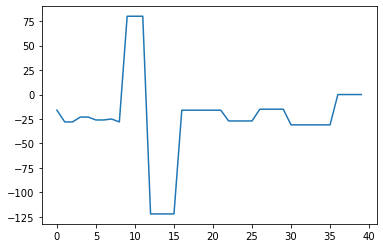

In [4]:
# pl.plot(inputArr)
pl.plot(outputArr[:2000])
pl.show()